## Unsupervised Learning using PCA and K-Means Clustering


#### List of Import Statements 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
file = ('./adult.csv')
df = pd.read_csv(file, encoding='latin-1')

In [4]:
df.shape

(32561, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df[df == '?'] = np.nan

for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
X = df.drop(['income'], axis=1)
y = df['income']
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Label Encoding 

<b> Label encoding </b> is a technique used to convert categorical data into numerical data by assigning a unique integer value to each distinct category in the feature. It is particularly useful in machine learning algorithms, which generally expect numerical inputs.

In [12]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

#### StandardScalar

<b> StandardScaler </b> is a preprocessing technique in scikit-learn that standardizes the features of a dataset by transforming them into a common scale with zero mean and unit variance. This is also known as z-score normalization or standardization. Standardizing the features is often helpful for improving the performance of machine learning algorithms, especially for those that are sensitive to the scale of the input features, such as logistic regression, support vector machines, and neural networks.

In [13]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy with all the features: 0.8213


### Principal Componenet Analysis (PCA)

<b> PCA (Principal Component Analysis) </b> is a dimensionality reduction technique that is widely used in machine learning to transform a high-dimensional dataset into a lower-dimensional space while preserving as much variance as possible. This is achieved by projecting the data points onto new axes called principal components, which are linear combinations of the original features. The first principal component captures the largest amount of variance in the dataset, the second principal component captures the largest amount of remaining variance orthogonal to the first component, and so on.

In [15]:
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

We observe that around 97.25% of the variance is accounted for by the first 13 variables. The remaining 2.75% of the variance is explained by the last variable, which suggests that it carries minimal information.

In [28]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score the first 13 features: 0.8213


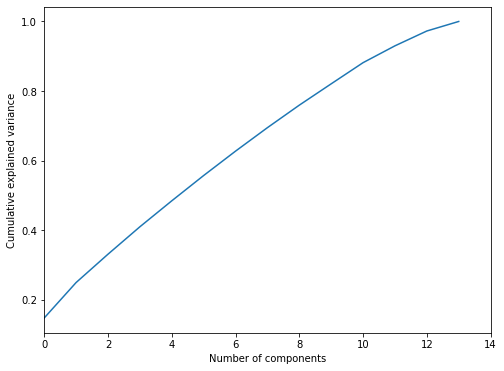

In [17]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

#### K-means Clustering - 

<b> K-means clustering </b> is an unsupervised machine learning algorithm used for partitioning a dataset into K distinct non-overlapping clusters based on the similarity of data points. The goal of K-means clustering is to <b> minimize the within-cluster sum of squares (WCSS) </b>, which is the sum of squared distances between each data point in a cluster and the cluster's centroid.

The algorithm works iteratively as follows:

1. Initialize K cluster centroids randomly by selecting K data points from the dataset.
2. Assign each data point to the closest centroid, forming K clusters.
3. Update the centroids by calculating the mean of all data points belonging to each cluster.
4. Repeat steps 2 and 3 until the centroids' positions stop changing, or a predefined stopping criterion is met.

K-means clustering is sensitive to the initial placement of the centroids, and it may converge to a local minimum of WCSS. To mitigate this issue, the algorithm can be run multiple times with different initial centroid placements, and the clustering solution with the lowest WCSS is chosen.

The choice of K, the number of clusters, is an important parameter in K-means clustering. It can be determined using various techniques, such as the elbow method, silhouette analysis, or domain-specific knowledge.

K-means clustering is widely used in data analysis, image segmentation, customer segmentation, anomaly detection, and other applications where discovering natural groupings in the data is essential.

In [30]:
# Use KMeans clustering
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
X_train_kmeans = kmeans.fit_transform(X_train)
X_test_kmeans = kmeans.transform(X_test)


In [20]:
# Append the KMeans cluster labels to the original scaled features
X_train_with_clusters = np.hstack((X_train, X_train_kmeans.argmax(axis=1).reshape(-1, 1)))
X_test_with_clusters = np.hstack((X_test, X_test_kmeans.argmax(axis=1).reshape(-1, 1)))

In [27]:
# Train and test the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_with_clusters, y_train)
y_pred = logreg.predict(X_test_with_clusters)

print('Logistic Regression accuracy with KMeans clustering: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy with KMeans clustering: 0.8214


#### Elbow Plot -

The elbow plot is a graphical method used to determine the <b> optimal number of clusters (K) </b> in K-means clustering. The plot displays the <b> within-cluster sum of squares (WCSS) </b> against the number of clusters. WCSS is the sum of squared distances between each data point in a cluster and the cluster's centroid. The elbow plot helps you identify the point at which adding more clusters does not lead to a significant decrease in WCSS, indicating diminishing returns in terms of cluster separation.

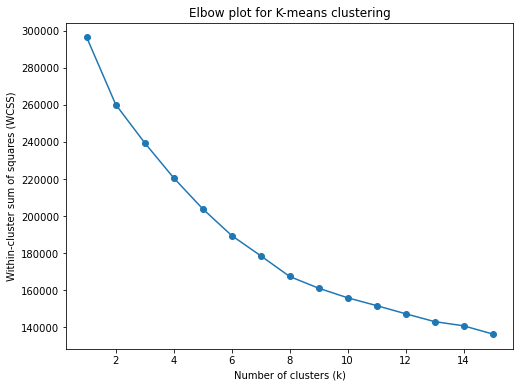

In [31]:
# Generate sample data
data = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create an elbow plot for K-means clustering
wcss = []
max_clusters = 15
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow plot for K-means clustering')
plt.show()